In [116]:
from google.colab import drive

drive.mount("/content/gdrive")  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [117]:
%cd "/content/gdrive/MyDrive/IA/Estadistica"
%ls

/content/gdrive/MyDrive/IA/Estadistica
bcase.html   Entregable2.html     Entregable2Pt2.ipynb
bcase.ipynb  Entregable2.ipynb    Firmas.csv
Datos.csv    Entregable2Pt2.html  Indicadores.csv


Importación de librerías

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns


Lectura de datos

In [119]:
df_firms = pd.read_csv('Firmas.csv')
df_data = pd.read_csv('Datos.csv')


In [120]:
df_firms.head()

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-
1,TXG,"10x Genomics, Inc",2,Com A,US,Stock,Manufacturing,NASDAQ,Electric Electron,"Navigational, Measuring, Electromedical, and C...",-
2,GOED,1847 Goedeker Inc,3,Com,US,Stock,Retail Trade,AMEX,Trade,Furniture and Home Furnishings Stores,-
3,ONEM,"1life Healthcare, Inc",4,Com,US,Stock,Health Care and Social Assistance,NASDAQ,Other,Offices of Physicians,-
4,SRCE,1st Source Corp,5,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Depository Credit Intermediation,-


In [121]:
df_data.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000,1
1,A,2000q2,2485000.0,1261000.0,1010000.0,0.0,42000.0,0.0,90000.0,7321000.0,2679000.0,512000.0,0.0,4642000.0,45.215607,73.7500,452271.967,6.0,2000,2
2,A,2000q3,2670000.0,1369000.0,1091000.0,0.0,28000.0,0.0,83000.0,7827000.0,2925000.0,528000.0,0.0,4902000.0,30.003238,48.9375,453014.579,9.0,2000,3
3,A,2000q4,3372000.0,1732000.0,1182000.0,0.0,10000.0,0.0,163000.0,8425000.0,3160000.0,830000.0,0.0,5265000.0,33.566841,54.7500,456366.381,12.0,2000,4
4,A,2001q1,2841000.0,1449000.0,1113000.0,0.0,-6000.0,0.0,119000.0,9208000.0,3667000.0,556000.0,0.0,5541000.0,18.840347,30.7300,456769.737,3.0,2001,1


In [122]:
df_firms.columns = df_firms.columns.str.replace('Ticker', 'firm')

In [123]:
df_mrg = pd.merge(df_firms, df_data, on="firm")

In [124]:
df_mrg = df_mrg.drop(['N', 'Class', 'Country\nof Origin', "Type of Asset", "partind", "Sector NAICS\nlast available", "Exchange / Src", "year", "cto"], axis=1)


In [125]:
df_mrg["Book value"] = df_mrg["totalassets"] - df_mrg["totalliabilities"]
df_mrg["Market value"] = df_mrg["originalprice"] * df_mrg["sharesoutstanding"]

In [126]:
df_mrg["Operating profit margin"] = df_mrg["revenue"] - df_mrg["cogs"] - df_mrg["sgae"]

In [127]:
df_mrg["Ebit"] = df_mrg["revenue"] - df_mrg["cogs"] - df_mrg["sgae"] - df_mrg["otheropexp"]

In [128]:
df_mrg["OPM"] = df_mrg["Ebit"] / df_mrg["revenue"] 

In [129]:
df_mrg["Net income"] = df_mrg["Ebit"] - df_mrg["incometax"] - df_mrg["finexp"]

In [130]:
df_mrg["Profit margin"] = df_mrg["Net income"] / df_mrg["revenue"] 

In [131]:
df_mrg['qdate'] = pd.PeriodIndex(df_mrg["q"], freq="Q")

df_mrg.set_index(['firm', 'qdate'], drop=False)

firm                   Name Sector NAICS\nlevel 1  \
firm qdate                                                       
FLWS 2000Q1  FLWS  1 800 Flowers Com Inc          Retail Trade   
     2000Q2  FLWS  1 800 Flowers Com Inc          Retail Trade   
     2000Q3  FLWS  1 800 Flowers Com Inc          Retail Trade   
     2000Q4  FLWS  1 800 Flowers Com Inc          Retail Trade   
     2001Q1  FLWS  1 800 Flowers Com Inc          Retail Trade   
...           ...                    ...                   ...   
ZNGA 2021Q2  ZNGA              Zynga Inc           Information   
     2021Q3  ZNGA              Zynga Inc           Information   
     2021Q4  ZNGA              Zynga Inc           Information   
     2022Q1  ZNGA              Zynga Inc           Information   
     2022Q2  ZNGA              Zynga Inc           Information   

            Sector\nEconomatica       q   revenue      cogs      sgae  \
firm qdate                                                              
FLWS 2000Q1               Trade  2000q1   85045.0   54143.0   52146.0   
     2000Q2               Trade  2000q2  123288.0   75607.0   63201.0   
     2000Q3               Trade  2000q3   72516.0   45091.0   51590.0   
     2000Q4               Trade  2000q4  134243.0   79099.0   67206.0   
     2001Q1               Trade  2001q1  103221.0   64020.0   48856.0   
...                         ...     ...       ...       ...       ...   
ZNGA 2021Q2     Software & Data  2021q2  720000.0  253300.0  391900.0   
     2021Q3     Software & Data  2021q3  704700.0  240800.0  409400.0   
     2021Q4     Software & Data  2021q4  695500.0  260100.0  436600.0   
     2022Q1     Software & Data  2022q1  691200.0  252200.0  424000.0   
     2022Q2     Software & Data  2022q2       NaN       NaN       NaN   

             otheropexp  extraincome  ...  sharesoutstanding  fiscalmonth  \
firm qdate                            ...                                   
FLWS 2000Q1         0.0        111.0  ...          64097.913          9.0   
     2000Q2         0.0         27.0  ...          64170.913         12.0   
     2000Q3         0.0         88.0  ...          64185.913          3.0   
     2000Q4         0.0        335.0  ...          64187.163          6.0   
     2001Q1         0.0         76.0  ...          64187.163          9.0   
...                 ...          ...  ...                ...          ...   
ZNGA 2021Q2         0.0      -9100.0  ...        1088762.805          6.0   
     2021Q3     66800.0       -600.0  ...        1091890.649          9.0   
     2021Q4         0.0     -10400.0  ...        1120181.490         12.0   
     2022Q1         0.0     -15700.0  ...        1132408.337          3.0   
     2022Q2         NaN          NaN  ...        1137273.677          NaN   

             Book value  Market value  Operating profit margin     Ebit  \
firm qdate                                                                
FLWS 2000Q1    171804.0  4.566976e+05                 -21244.0 -21244.0   
     2000Q2    158918.0  3.288759e+05                 -15520.0 -15520.0   
     2000Q3    136286.0  3.199267e+05                 -24165.0 -24165.0   
     2000Q4    125752.0  2.647720e+05                 -12062.0 -12062.0   
     2001Q1    117240.0  5.134973e+05                  -9655.0  -9655.0   
...                 ...           ...                      ...      ...   
ZNGA 2021Q2   3020600.0  1.157355e+07                  74800.0  74800.0   
     2021Q3   3007000.0  8.221937e+06                  54500.0 -12300.0   
     2021Q4   3111900.0  7.169162e+06                  -1200.0  -1200.0   
     2022Q1   2906100.0  1.046345e+07                  15000.0  15000.0   
     2022Q2         NaN  9.302899e+06                      NaN      NaN   

                  OPM  Net income  Profit margin   qdate  
firm qdate                                                
FLWS 2000Q1 -0.249797    -19376.0      -0.227832  2000Q1  
     2000Q2 -0.125884    -12937.0      -0.104933 

In [132]:
df_reg = df_mrg.copy()

In [133]:
df_reg["EPS"] = df_reg['Net income'] / df_reg["sharesoutstanding"]

In [134]:
df_reg["EPSP"] = (df_reg['EPS'] / df_reg["originalprice"])

In [135]:
df_reg["Sales anual growht"] = (df_reg['revenue'] / df_reg.groupby(["firm"])["revenue"].shift(4)) - 1

In [136]:
df_reg["Operating profit growht"] = (df_reg['Ebit'] / df_reg.groupby(["firm"])["Ebit"].shift(4)) - 1

In [137]:
df_reg["Operating profit margin"] = df_reg['Ebit'] / df_reg['revenue']

In [138]:
df_reg['Book to market ratio'] = df_reg['Book value'] / df_reg['Market value']

In [139]:
df_reg['Short financial leverage'] = df_reg['shortdebt'] / df_reg['totalassets']

In [140]:
df_reg['Long financial leverage'] = df_reg['longdebt'] / df_reg['totalassets']

In [141]:
df_reg["Stock annual return"] = np.log(df_reg['adjprice']) - np.log(df_reg.groupby(["firm"])['adjprice'].shift(4))

In [142]:
df_reg["F1r"] = df_reg.groupby(["firm"])['Stock annual return'].shift(-1)

In [144]:
df_reg.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [145]:
def dense_inclusive_pct(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

df_reg["pct"]=df_reg.groupby('q')['Market value'].apply(dense_inclusive_pct).astype(int)


df_reg["isSmall"] = df_reg.pct <= 33
df_reg["isSmall"] = df_reg["isSmall"].astype(int)

df_reg["isMedium"] = (df_reg.pct <= 66) & (df_reg.pct > 33) 
df_reg["isMedium"] = df_reg["isMedium"].astype(int)

In [146]:
is_man=df_reg[df_reg["Sector NAICS\nlevel 1"]!="Manufacturing"].index
df_reg=df_reg.drop(is_man)

In [147]:
df_regL = df_reg.loc[:, ["firm","q","Stock annual return", "F1r","EPSP", "Sales anual growht", "Operating profit growht", "Operating profit margin", 'Book to market ratio', 'Short financial leverage', 'Long financial leverage', 'isSmall', 'isMedium']]

In [148]:
df_regL.head()

,firm,q,Stock annual return,F1r,EPSP,Sales anual growht,Operating profit growht,Operating profit margin,Book to market ratio,Short financial leverage,Long financial leverage,isSmall,isMedium
90,TXG,2000q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
91,TXG,2000q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
92,TXG,2000q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
93,TXG,2000q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
94,TXG,2001q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


Obtención de las variables independientes y dependientes

In [149]:
df_train = df_regL.copy()

In [150]:
df_train = df_train.reset_index(drop = True)

In [151]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [152]:
df_vals = df_train[["EPSP","Operating profit growht","Short financial leverage","Sales anual growht", 'isSmall', 'isMedium', 'q']]

In [153]:
df_fd=df_vals.loc[(df_vals["q"] != "2022q1")].index
df_vals=df_vals.drop(df_fd)

In [154]:
df_fd=df_train.loc[(df_train["q"] != "2022q1")].index
df_train=df_train.drop(df_fd)

In [155]:
df_vals = df_vals.drop(['q'], axis=1)

In [157]:
df_train['b'] = 1

# Matriz de varianza y covarianza

In [158]:
df_cov_vals = df_train[["EPSP","Operating profit growht","Short financial leverage","Sales anual growht", 'isSmall', 'isMedium', 'F1r']]

In [159]:
xt = df_cov_vals.transpose()

In [160]:
n = len(df_cov_vals)

In [161]:
ones = np.ones((n,1))

In [162]:
xt1 = xt.dot(ones)

In [163]:
xtx = xt.dot(df_cov_vals)

In [164]:
xt1t = xt1.transpose()

In [165]:
VarCov = (1/(n-1))*(xtx - (1/n)*(xt1.dot(xt1t)) )

In [166]:
VarCov

,EPSP,Operating profit growht,Short financial leverage,Sales anual growht,isSmall,isMedium,F1r
EPSP,0.013539,-0.017386,-0.001592,0.116067,-0.026455,0.011529,0.052053
Operating profit growht,-0.017386,191.432482,-0.044949,2.650270,0.026046,-0.205699,-0.600087
Short financial leverage,-0.001592,-0.044949,0.014497,-0.050491,0.003485,-0.003064,-0.006524
Sales anual growht,0.116067,2.650270,-0.050491,2454.581464,-0.088603,-0.229245,-1.702871
isSmall,-0.026455,0.026046,0.003485,-0.088603,0.247243,-0.133175,-0.160438
isMedium,0.011529,-0.205699,-0.003064,-0.229245,-0.133175,0.209492,0.054882
F1r,0.052053,-0.600087,-0.006524,-1.702871,-0.160438,0.054882,0.567820


In [167]:
df_cov_vals.cov()

,EPSP,Operating profit growht,Short financial leverage,Sales anual growht,isSmall,isMedium,F1r
EPSP,0.013539,-0.017386,-0.001592,0.116067,-0.026455,0.011529,0.052053
Operating profit growht,-0.017386,191.432482,-0.044949,2.650270,0.026046,-0.205699,-0.600087
Short financial leverage,-0.001592,-0.044949,0.014497,-0.050491,0.003485,-0.003064,-0.006524
Sales anual growht,0.116067,2.650270,-0.050491,2454.581464,-0.088603,-0.229245,-1.702871
isSmall,-0.026455,0.026046,0.003485,-0.088603,0.247243,-0.133175,-0.160438
isMedium,0.011529,-0.205699,-0.003064,-0.229245,-0.133175,0.209492,0.054882
F1r,0.052053,-0.600087,-0.006524,-1.702871,-0.160438,0.054882,0.567820


De igual manera los resultados son iguales entre álgebra matricial y el framework.

Esta matriz representa que tanto varia una variable con respecto a la otra, en caso de compararse consigo misma se compara con su promedio.

# Matriz de correlación

OBTENCION DE LA DESVIACION ESRÁNDAR

In [168]:
var = np.array([])
for i in range(len(VarCov)) :
  var = np.append(var, VarCov.iloc[i,i])


In [169]:
vars = pd.DataFrame(var)
vars = vars.transpose()

In [170]:
vars.columns = ['EPSP','Operating profit growht','Short financial leverage', 'Sales anual growht', 'isSmall', 'isMedium', 'Fir']

In [171]:
stds = var ** 0.5

In [172]:
stds

array([ 0.11635786, 13.83591275,  0.1204023 , 49.54373284,  0.49723503,
        0.45770332,  0.75353839])

In [173]:
stdMat = [[ 0 for y in range( len(stds) ) ] for x in range( len(stds) )]
for i in range(len(stds)):
  for j in range(len(stds)):
    stdMat[i][j] = stds[i] * stds[j]


In [174]:
cov = VarCov.to_numpy()

OBTENCION DE LA MATRIZ DE CORRELACION

In [175]:
corrMat = cov / stdMat
corrMat = pd.DataFrame(corrMat)

In [176]:
corrMat.columns = ['EPSP','Operating profit growht','Short financial leverage', 'Sales anual growht', 'isSmall', 'isMedium', 'Fir']

In [177]:
corrMat = corrMat.transpose()
corrMat.columns = ['EPSP','Operating profit growht','Short financial leverage', 'Sales anual growht', 'isSmall', 'isMedium', 'Fir']

In [178]:
corrMat

,EPSP,Operating profit growht,Short financial leverage,Sales anual growht,isSmall,isMedium,Fir
EPSP,1.000000,-0.010799,-0.113609,0.020134,-0.457242,0.216469,0.593674
Operating profit growht,-0.010799,1.000000,-0.026982,0.003866,0.003786,-0.032482,-0.057557
Short financial leverage,-0.113609,-0.026982,1.000000,-0.008464,0.058214,-0.055600,-0.071910
Sales anual growht,0.020134,0.003866,-0.008464,1.000000,-0.003597,-0.010109,-0.045613
isSmall,-0.457242,0.003786,0.058214,-0.003597,1.000000,-0.585161,-0.428193
isMedium,0.216469,-0.032482,-0.055600,-0.010109,-0.585161,1.000000,0.159126
Fir,0.593674,-0.057557,-0.071910,-0.045613,-0.428193,0.159126,1.000000


In [179]:
df_cov_vals.corr()

,EPSP,Operating profit growht,Short financial leverage,Sales anual growht,isSmall,isMedium,F1r
EPSP,1.000000,-0.010799,-0.113609,0.020134,-0.457242,0.216469,0.593674
Operating profit growht,-0.010799,1.000000,-0.026982,0.003866,0.003786,-0.032482,-0.057557
Short financial leverage,-0.113609,-0.026982,1.000000,-0.008464,0.058214,-0.055600,-0.071910
Sales anual growht,0.020134,0.003866,-0.008464,1.000000,-0.003597,-0.010109,-0.045613
isSmall,-0.457242,0.003786,0.058214,-0.003597,1.000000,-0.585161,-0.428193
isMedium,0.216469,-0.032482,-0.055600,-0.010109,-0.585161,1.000000,0.159126
F1r,0.593674,-0.057557,-0.071910,-0.045613,-0.428193,0.159126,1.000000


LOS RESULTADOS SON LOS MISMOS ENTRE AMBAS SALIDAS.
RECORDEMOS QUE LA CORRELACIÓN ES QUE TANTO SE RELACIONAN LAS VARIALES ENTRE CADA UNA DE ELLAS, ESTEO QUIERE DECIR QUE MIENTRAS MAYOR SEA LA CORRELACIÓN HAY UN MAYOR PODER EXPLICATIVO

# Leverage points

Los leverage points son aquellos datos que tienen una alta influencia en el momento del entrenamiento del modelo provocando una mayor impresición en las predcciones del modelo.

In [180]:
X_tmp = df_train[['EPSP','Operating profit growht','Short financial leverage', 'Sales anual growht', 'isSmall', 'isMedium']]
y_tmp = df_train["F1r"]

Text(0.5, 1.0, 'Leverage Values (obtained with matrix algebra)')

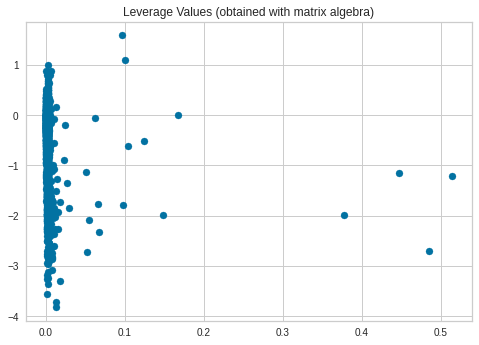

In [181]:
df_tmp = df_train
df_tmp['l'] = np.diagonal(np.dot(np.dot(X_tmp, np.linalg.inv(X_tmp.T @ X_tmp)), X_tmp.T))
import matplotlib.pyplot as plt
plt.scatter(df_tmp['l'], y_tmp)
plt.title("Leverage Values (obtained with matrix algebra)")

Validación con librería

In [182]:
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 1.0, 'Leverage Values (obtained with statsmodels framework)')

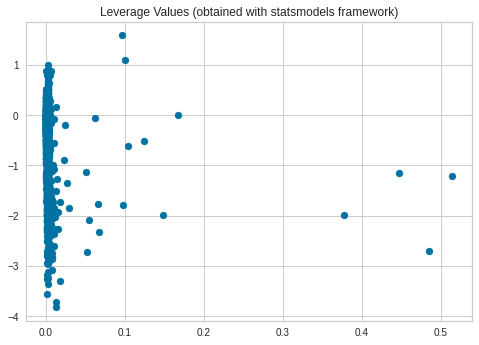

In [183]:
X = df_train[['EPSP','Operating profit growht','Short financial leverage', 'Sales anual growht', 'isSmall', 'isMedium']]
x = sm.add_constant(X)
y = df_train["F1r"]
m = sm.OLS(y, X).fit()

influence_values = m.get_influence()
l = influence_values.hat_matrix_diag

plt.scatter(l, y)
plt.title("Leverage Values (obtained with statsmodels framework)")

Los resultados en ambos gráficos es el mismo, dando como conclusión que el resultado obtenido es correcto

Ahora obtendremos el valor de tolerancia de los leverage points, esto es obtenido por medio de la formula:


*3(k+1)/n*, DONDE: 
* k = Número de independientes (5)
* n = Número de registros (1565)

In [184]:
tol_lev = 3 *((6+1)/1565)
tol_lev

0.0134185303514377

In [185]:
df_train["leverage"] = l

EN LA SIGUIENTE TABLA SE MUESTRAN LOS REGISTROS QUE NO CUMPLEN CON LA TOLERANCIA DE LOS LEVERAGE POINTS

In [186]:
lev_filter = df_train['leverage'] > tol_lev
df_train[lev_filter]

,firm,q,Stock annual return,F1r,EPSP,Sales anual growht,Operating profit growht,Operating profit margin,Book to market ratio,Short financial leverage,Long financial leverage,isSmall,isMedium,b,l,leverage
2515,ACOR,2022q1,-1.106860,-2.326345,-1.149488,-0.219250,-0.419652,-0.741235,5.978959,0.020691,0.439265,1,0,1,0.067248,0.067248
3055,AFIB,2022q1,-2.263710,-2.718707,-1.018040,0.025063,0.387921,-10.494431,1.749318,0.003806,0.343842,1,0,1,0.051894,0.051894
7465,ALLK,2022q1,-3.002551,-3.305962,-0.627346,0.000000,2.519852,0.000000,0.833634,0.000000,0.139842,1,0,1,0.018027,0.018027
7735,ALNA,2022q1,-1.793776,-1.917846,-0.568804,0.000000,0.012883,0.000000,0.559650,0.246043,0.000000,1,0,1,0.015267,0.015267
18985,AYTU,2022q1,-1.951187,-1.982500,-1.669180,0.794874,1.129499,-2.258564,1.867356,0.045887,0.126604,1,0,1,0.148687,0.148687
20245,BEAM,2022q1,-0.334226,-1.201464,-0.019192,1404.333333,-0.619584,-9.039967,0.210517,0.008047,0.250124,0,0,1,0.513527,0.513527
24295,BPT,2022q1,1.517104,1.586539,0.038825,0.000000,-166.826667,0.971565,0.017050,0.000000,0.000000,1,0,1,0.096013,0.096013
28075,CBIO,2022q1,-2.032922,-0.888954,-0.699692,-0.458759,-0.344817,-18.515113,1.303691,0.047400,0.000000,1,0,1,0.022587,0.022587
36805,CRWS,2022q1,-0.067338,-0.063960,0.036786,0.176961,-133.000000,0.118197,0.697949,0.030455,0.013449,1,0,1,0.061933,0.061933
48685,EVFM,2022q1,-1.638425,-2.708050,-0.507150,2.847059,-0.355300,-6.805222,-2.245547,3.364236,0.117411,1,0,1,0.485178,0.485178


# Outliers

En estadística, un outlier es una observación que es numéricamente distante del resto de los datos. Las estadísticas derivadas de los conjuntos de datos que incluyen valores atípicos serán frecuentemente engañosas.

**Cook distance**

Traducción del inglés-En estadística, cooks distance es una estimación de uso común de la influencia de un punto de datos cuando se realiza un análisis de regresión de mínimos cuadrados.

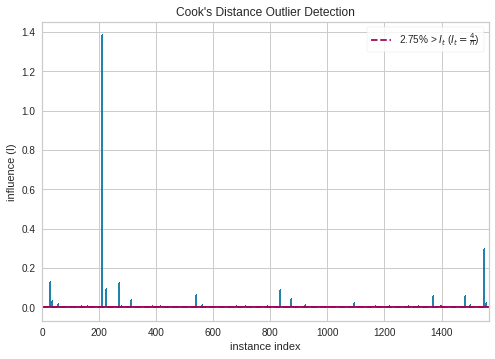

In [187]:
from yellowbrick.regressor import CooksDistance
X = df_train[['EPSP','Operating profit growht','Short financial leverage', 'Sales anual growht', 'isSmall', 'isMedium', "b"]]
y = df_train["F1r"]
m = sm.OLS(y, X).fit()
influence_values = m.get_influence()
l = influence_values.hat_matrix_diag

visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

Se pueden observar a simple vista que hay valores muy destacables, el valor de tolerancia se hara por regla de dedo, tomando como leverage points aquellos que pasen 3 veces la media dek valor de cook distance

In [188]:
(cooks, p) = influence_values.cooks_distance
cooks_df = pd.DataFrame(cooks)
cooks_df.columns = ["cooks"]
cooks_df.describe()

,cooks
count,1.565000e+03
mean,1.916842e-03
std,3.630601e-02
min,4.214183e-11
25%,2.340994e-05
50%,1.094309e-04
75%,3.511314e-04
max,1.383181e+00


In [189]:
df_train["cook"] = cooks

In [190]:
tol_cook = df_train["cook"].mean() * 3

In [191]:
cooks_filter = df_train['cook'] > tol_cook
df_train[cooks_filter]

,firm,q,Stock annual return,F1r,EPSP,Sales anual growht,Operating profit growht,Operating profit margin,Book to market ratio,Short financial leverage,Long financial leverage,isSmall,isMedium,b,l,leverage,cook
2515,ACOR,2022q1,-1.106860,-2.326345,-1.149488,-0.219250,-0.419652,-0.741235,5.978959,0.020691,0.439265,1,0,1,0.067248,0.067248,0.128815
3055,AFIB,2022q1,-2.263710,-2.718707,-1.018040,0.025063,0.387921,-10.494431,1.749318,0.003806,0.343842,1,0,1,0.051894,0.051894,0.033864
5215,AGRX,2022q1,-2.295399,-3.821337,-0.417307,14.181034,-0.040007,-8.843271,0.097262,0.426055,0.024165,1,0,1,0.012744,0.012744,0.017933
18985,AYTU,2022q1,-1.951187,-1.982500,-1.669180,0.794874,1.129499,-2.258564,1.867356,0.045887,0.126604,1,0,1,0.148687,0.148687,1.383181
20245,BEAM,2022q1,-0.334226,-1.201464,-0.019192,1404.333333,-0.619584,-9.039967,0.210517,0.008047,0.250124,0,0,1,0.513527,0.513527,0.093178
24295,BPT,2022q1,1.517104,1.586539,0.038825,0.000000,-166.826667,0.971565,0.017050,0.000000,0.000000,1,0,1,0.096013,0.096013,0.124752
28075,CBIO,2022q1,-2.032922,-0.888954,-0.699692,-0.458759,-0.344817,-18.515113,1.303691,0.047400,0.000000,1,0,1,0.022587,0.022587,0.039109
37165,CTIC,2022q1,0.473006,0.870456,-0.079644,0.000000,1.056239,-15.294118,-0.059829,0.361555,0.000000,1,0,1,0.006160,0.006160,0.008318
48685,EVFM,2022q1,-1.638425,-2.708050,-0.507150,2.847059,-0.355300,-6.805222,-2.245547,3.364236,0.117411,1,0,1,0.485178,0.485178,0.060212
50575,FWBI,2022q1,-2.536986,-3.713572,-0.530289,0.000000,0.142269,0.000000,-0.521943,0.053657,0.000000,1,0,1,0.012188,0.012188,0.009832


**dffits**

El DFFITS son diagnósticos destinados a mostrar cuán influyente es un punto en una regresión estadística.

In [192]:
(dffits, p) = influence_values.dffits

In [193]:
dffits_df = pd.DataFrame(dffits)
dffits_df.columns = ["dffits"]
dffits_df.describe()

,dffits
count,1565.000000
mean,0.004736
std,0.116817
min,-0.649101
25%,-0.025179
50%,0.004377
75%,0.030126
max,3.167238


In [194]:
df_train["dffits"] = dffits

In [195]:
import math
tol_dff = 2 * math.sqrt(6/1565) 
dffits_filter = df_train['dffits'] > tol_dff
df_train[dffits_filter]

,firm,q,Stock annual return,F1r,EPSP,Sales anual growht,Operating profit growht,Operating profit margin,Book to market ratio,Short financial leverage,Long financial leverage,isSmall,isMedium,b,l,leverage,cook,dffits
2515,ACOR,2022q1,-1.106860,-2.326345,-1.149488,-0.219250,-0.419652,-0.741235,5.978959,0.020691,0.439265,1,0,1,0.067248,0.067248,0.128815,0.953092
3055,AFIB,2022q1,-2.263710,-2.718707,-1.018040,0.025063,0.387921,-10.494431,1.749318,0.003806,0.343842,1,0,1,0.051894,0.051894,0.033864,0.487392
4225,AEHR,2022q1,1.394200,0.999672,0.008163,1.901652,-4.460123,0.147615,0.160813,0.013565,0.007236,1,0,1,0.002313,0.002313,0.002453,0.131318
18985,AYTU,2022q1,-1.951187,-1.982500,-1.669180,0.794874,1.129499,-2.258564,1.867356,0.045887,0.126604,1,0,1,0.148687,0.148687,1.383181,3.167238
20245,BEAM,2022q1,-0.334226,-1.201464,-0.019192,1404.333333,-0.619584,-9.039967,0.210517,0.008047,0.250124,0,0,1,0.513527,0.513527,0.093178,0.807518
24295,BPT,2022q1,1.517104,1.586539,0.038825,0.000000,-166.826667,0.971565,0.017050,0.000000,0.000000,1,0,1,0.096013,0.096013,0.124752,0.936659
28075,CBIO,2022q1,-2.032922,-0.888954,-0.699692,-0.458759,-0.344817,-18.515113,1.303691,0.047400,0.000000,1,0,1,0.022587,0.022587,0.039109,0.525048
34645,CNCE,2022q1,-0.392523,-0.002372,-0.305689,-1.000000,0.502419,0.000000,0.650006,0.009396,0.104891,1,0,1,0.003903,0.003903,0.004266,0.173176
37165,CTIC,2022q1,0.473006,0.870456,-0.079644,0.000000,1.056239,-15.294118,-0.059829,0.361555,0.000000,1,0,1,0.006160,0.006160,0.008318,0.241938
40675,DRMA,2022q1,0.000000,0.000000,-0.267622,0.000000,0.000000,0.000000,0.754268,0.000000,0.000000,1,0,1,0.003112,0.003112,0.002906,0.142881


Ya tenemos tanto leverage points, como dos evaluaciones distintas de outliers, procederemos a eliminar aquellos que no cumplan con las 3 tolerancias, con esto nos aseguramos de solo eliminar aquellos que realmente afecten al modelo

In [196]:
df_train = df_train.reset_index(drop = True)

In [197]:
df_train

,firm,q,Stock annual return,F1r,EPSP,Sales anual growht,Operating profit growht,Operating profit margin,Book to market ratio,Short financial leverage,Long financial leverage,isSmall,isMedium,b,l,leverage,cook,dffits
0,TXG,2022q1,-0.866843,-1.464993,-0.004894,0.081978,3.085258,-0.364511,0.093974,0.007612,0.093235,0,0,1,0.000036,0.000036,0.001547,-0.104179
1,XXII,2022q1,-0.349320,-0.776435,-0.021430,0.328974,0.575324,-0.900608,0.153350,0.005400,0.019947,1,0,1,0.001902,0.001902,0.000004,-0.005462
2,ME,2022q1,-0.976577,-1.550475,-0.040538,0.000000,24.978416,-0.690679,0.534689,0.006757,0.068159,0,1,1,0.004345,0.004345,0.001604,-0.106029
3,MMM,2022q1,-0.225228,-0.393073,0.015805,-0.002486,-0.177031,0.185865,0.177098,0.046625,0.336038,0,0,1,0.000118,0.000118,0.000045,-0.017770
4,FDMT,2022q1,-1.053980,-1.238333,-0.053940,-0.390500,0.617950,-21.650533,0.607380,0.006269,0.045493,1,0,1,0.001638,0.001638,0.000127,-0.029797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,ZBH,2022q1,-0.184146,-0.384678,0.004833,-0.099708,-0.253012,0.119288,0.449334,0.046930,0.244538,0,0,1,0.000101,0.000101,0.000028,-0.014046
1561,ZIMV,2022q1,0.000000,0.000000,-0.043494,0.000000,0.000000,-0.138467,1.363767,0.007905,0.328861,0,1,1,0.002223,0.002223,0.000278,0.044077
1562,ZTS,2022q1,0.185828,-0.075013,0.006752,0.061464,0.054960,0.396274,0.052332,0.097403,0.388600,0,0,1,0.000427,0.000427,0.000023,0.012764
1563,ZWS,2022q1,0.416636,0.093173,0.006535,-0.544573,-0.441476,0.183222,0.043502,0.005006,0.483014,0,0,1,0.000005,0.000005,0.000099,0.026332


In [198]:
df_train_clean = df_train[(df_train.dffits <= tol_dff) & (df_train.cook <= tol_cook) & (df_train.leverage <= tol_lev)]

In [199]:
df_train_clean

,firm,q,Stock annual return,F1r,EPSP,Sales anual growht,Operating profit growht,Operating profit margin,Book to market ratio,Short financial leverage,Long financial leverage,isSmall,isMedium,b,l,leverage,cook,dffits
0,TXG,2022q1,-0.866843,-1.464993,-0.004894,0.081978,3.085258,-0.364511,0.093974,0.007612,0.093235,0,0,1,0.000036,0.000036,0.001547,-0.104179
1,XXII,2022q1,-0.349320,-0.776435,-0.021430,0.328974,0.575324,-0.900608,0.153350,0.005400,0.019947,1,0,1,0.001902,0.001902,0.000004,-0.005462
2,ME,2022q1,-0.976577,-1.550475,-0.040538,0.000000,24.978416,-0.690679,0.534689,0.006757,0.068159,0,1,1,0.004345,0.004345,0.001604,-0.106029
3,MMM,2022q1,-0.225228,-0.393073,0.015805,-0.002486,-0.177031,0.185865,0.177098,0.046625,0.336038,0,0,1,0.000118,0.000118,0.000045,-0.017770
4,FDMT,2022q1,-1.053980,-1.238333,-0.053940,-0.390500,0.617950,-21.650533,0.607380,0.006269,0.045493,1,0,1,0.001638,0.001638,0.000127,-0.029797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,ZBH,2022q1,-0.184146,-0.384678,0.004833,-0.099708,-0.253012,0.119288,0.449334,0.046930,0.244538,0,0,1,0.000101,0.000101,0.000028,-0.014046
1561,ZIMV,2022q1,0.000000,0.000000,-0.043494,0.000000,0.000000,-0.138467,1.363767,0.007905,0.328861,0,1,1,0.002223,0.002223,0.000278,0.044077
1562,ZTS,2022q1,0.185828,-0.075013,0.006752,0.061464,0.054960,0.396274,0.052332,0.097403,0.388600,0,0,1,0.000427,0.000427,0.000023,0.012764
1563,ZWS,2022q1,0.416636,0.093173,0.006535,-0.544573,-0.441476,0.183222,0.043502,0.005006,0.483014,0,0,1,0.000005,0.000005,0.000099,0.026332


Se han eliminado 39 registros del dataset original, siendo estos los puntos que mayoritariamente afectan el modelo

In [200]:
X = df_train_clean[['EPSP','Operating profit growht','Short financial leverage', 'Sales anual growht', 'isSmall', 'isMedium', "b"]]
x = sm.add_constant(X)
y = df_train_clean["F1r"]
m2 = sm.OLS(y, X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [201]:
print('Modelo original: ', m.rsquared)
print('Modelo sin outlayers y leverage points: ', m2.rsquared)


Modelo original:  0.3964433590356963
Modelo sin outlayers y leverage points:  0.4529487145724831


COMO SE PUEDE OBSERVAR GRACIAS A LA ELIMINACIÓN DE OUTLAYERS Y LEVERAGE POINTS LA PRECISIÓN DEL MODELO A AUMENTADO EN 0.06, SIENDO BASTANTE BUENO BASADO EN EL CONTEXTO

# Multicolinealeidad

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_cov_vals.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_cov_vals.values, i)
                          for i in range(len(df_cov_vals.columns))]

print(vif_data)

                    feature       VIF
0                      EPSP  1.936446
1   Operating profit growht  1.007234
2  Short financial leverage  1.065732
3        Sales anual growht  1.008243
4                   isSmall  2.009876
5                  isMedium  1.148296
6                       F1r  2.679952


SE PUEDE OBSERVAR QUE ENTRE NINGANA DE LAS VARIABLES EXISTE MULTICOLINEALIDAD, ESTO SE DEFINE PORQUE NINGUNA DE ELLAS ES MAYOR A 10, RECORDEMOS QUE TENER MULTICOLINEALIDAD EN UNA DE LAS VARIABLES SIGNIFICA QUE YA ESTA EXPLICADA POR ALGUNA OTRA, EN CASO DE HABER ALGÚN CASO NORMALMENTE SE PROCEDE A ELIMINAR DICHA VARIABLE.

# Creación de modelo

In [203]:
first_column = df_train_clean.pop('b')
  
df_train_clean.insert(0, 'b', first_column)

In [204]:
df_vals = df_train_clean[["b","EPSP","Operating profit growht","Short financial leverage","Sales anual growht", 'isSmall', 'isMedium']]

In [205]:
t_x = df_vals.transpose()

In [206]:
xt_x = t_x.dot(df_vals)

In [207]:
inv = np.linalg.inv(xt_x)

In [208]:
xt_y = t_x.dot(df_train_clean["F1r"]) 

In [209]:
B = inv.dot(xt_y)

Valores de betas

In [210]:
B

array([-2.63722029e-01,  4.69286569e+00,  5.77499324e-04,  4.60724838e-01,
       -2.42625299e-03, -2.68682348e-01, -1.29659569e-01])

In [211]:
bethas = pd.DataFrame(B)
bethas = bethas.transpose()
bethas.columns = ['b','EPSP','Operating profit growht','Short financial leverage', 'Sales anual growht', 'isSmall', 'isMedium']
bethas.transpose()

,0
b,-0.263722
EPSP,4.692866
Operating profit growht,0.000577
Short financial leverage,0.460725
Sales anual growht,-0.002426
isSmall,-0.268682
isMedium,-0.129660


In [212]:
Y = df_train_clean["F1r"]

In [213]:
X2 = sm.add_constant(df_vals)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    F1r   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     209.6
Date:                Sat, 26 Nov 2022   Prob (F-statistic):          6.42e-195
Time:                        05:32:42   Log-Likelihood:                -1207.5
No. Observations:                1526   AIC:                             2429.
Df Residuals:                    1519   BIC:                             2466.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
b                       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


COMO SE PUEDE OBSERVAR, LOS RESULTADOS CON ÁLGEBRA MATRICIAL SON LOS MISMOS QUE CON EL USO DE FRAMEWORKS.

SE PUEDE OBSERVAR EN ESTOS CASOS QUE CASI TODAS LAS VARIABLES QUE TIENEN UNA RELACIÓN POSITIVA CON RESPECTO A SU MAGNITUD, LOS CUALES SON: EPSP, OPERATING PROFIT GROWHT Y SHORT FINANCIAL LEVERAGE, CON VALORES 4.69, 0.0006, 0.4607, AQUELLAS MAGNITUDES NEGATIVAS PERTENENECEN A SALES ANUAL GROWHT, ISMEDIUM Y ISSMALL CON -0.0024, -0.2687 Y -0.1297 RESPECTIVAMENTE.



RECORDEMOS QUE LA MAGNITUD ES EL CAMBIO DE LA INDEPENDIENTE CUANDO LA DEPENDIENTE CAMBIA EN 1 UNIDAD. POR EJEMPLO, CUANDO EL "EPSP" CAMBIA EN 1 UNIDAD EL 'F1r' CAMBIA EN 4.69 UNIDADES.

EXISTEN TAMBIEN LAS MAGNITUDES DE LOS TAMAÑOS DE LA EMPRESA, PERO COMO ESTA VARIABLE ES BINARIA SOLAMENTE SE LE SUMARÁ AL INTERCEPTO, DANDONOS COMO RESULTADO 3 DISTINTOS MODELOS, UNO PARA CADA TAMAÑO DE EMPRESA.